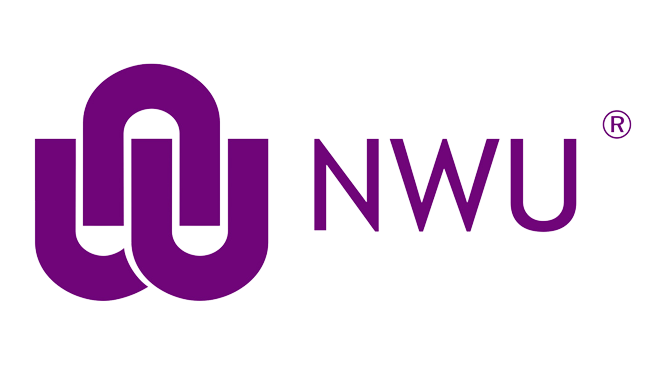

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname:Buhle Mnisi
*   # University Number: 38431173


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [79]:
import pandas as pd

# Load the file
countries_df = pd.read_csv("countries.csv")
population_df = pd.read_csv("world_population.csv")



In [80]:
def year_population(name_of_country):
    # Find the row index for the given country
    idx = countries_df[countries_df['Country Name'] == name_of_country].index[0]

    # Extract the population row for that country
    population_row = population_df.iloc[idx]

    # Create a dataframe
    df = pd.DataFrame({
        'Year': population_row.index.astype(int),
        'Population': population_row.values
    })

    return df

In [81]:

print(year_population("Aruba"))

    Year  Population
0   1960     54211.0
1   1961     55438.0
2   1962     56225.0
3   1963     56695.0
4   1964     57032.0
5   1965     57360.0
6   1966     57715.0
7   1967     58055.0
8   1968     58386.0
9   1969     58726.0
10  1970     59063.0
11  1971     59440.0
12  1972     59840.0
13  1973     60243.0
14  1974     60528.0
15  1975     60657.0
16  1976     60586.0
17  1977     60366.0
18  1978     60103.0
19  1979     59980.0
20  1980     60096.0
21  1981     60567.0
22  1982     61345.0
23  1983     62201.0
24  1984     62836.0
25  1985     63026.0
26  1986     62644.0
27  1987     61833.0
28  1988     61079.0
29  1989     61032.0
30  1990     62149.0
31  1991     64622.0
32  1992     68235.0
33  1993     72504.0
34  1994     76700.0
35  1995     80324.0
36  1996     83200.0
37  1997     85451.0
38  1998     87277.0
39  1999     89005.0
40  2000     90853.0
41  2001     92898.0
42  2002     94992.0
43  2003     97017.0
44  2004     98737.0
45  2005    100031.0
46  2006    1

# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.


_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [74]:
from sklearn.model_selection import train_test_split

def data_split(df):
    X = df[['Year']]
    y = df['Population']

     # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, y_train, X_test, y_test



In [75]:
data = year_population('Aruba')
X_train, y_train, X_test, y_test = data_split(data)

print("Training features:\n", X_train.head())
print("Training target:\n", y_train.head())

Training features:
     Year
36  1996
31  1991
8   1968
17  1977
6   1966
Training target:
 36    83200.0
31    64622.0
8     58386.0
17    60366.0
6     57715.0
Name: Population, dtype: float64


# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

In [76]:
from sklearn.linear_model import LinearRegression

data = year_population("Aruba")
X_train, y_train, X_test, y_test = data_split(data)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

def test_model(model, X_test, y_test):
    # Make predictions using the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [78]:
mse_result, r2_result = test_model(model, X_test, y_test)

print("Mean Squared Error:", mse_result)
print("R² Score:", r2_result)

Mean Squared Error: 42488189.31634962
R² Score: 0.8852462614197492
